# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### A. Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.35$ and a fixed random state = $42$.
2. Fit and visualize a decision tree classifier. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as m
from sklearn import datasets
data=datasets.make_moons(n_samples=100, noise=0.35, random_state=42)

In [7]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = m.colors.ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = m.colors.ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        

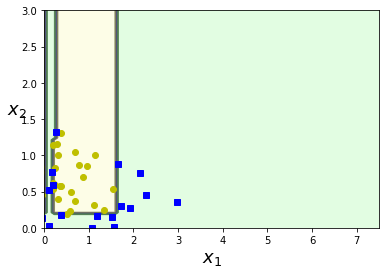

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(data[0],data[1]);
plot_decision_boundary(tree,data[0],data[1])

#### Q. Comment on the overfitting nature of the Decision trees

### **Ans:** Decision trees are prone to overfitting because, they are data intensive. At each node the split is decided based on the data. So it learns the training data perfectly and performs poor on other data. This explains the overfitting nature of Decision trees. The overfitting can be reduced by regularization

### B. Overfitting in decision tree classifiers

1. List and explain in a few lines, three of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.

**Ans:** 

**1) max_depth:** This feature decides the depth of the decision tree. It helps the model not to overfit because if the model is allowed to go deeper all the data is split at nodes and results is overlearning. 

**2) min_samples_leaf:** This feature decides the minimum number of samples should be there in a leaf node. This helps to smooth the model because if no minimum samples are set the tree goes on till the last sample is trained. Which is literally overfit. 

**3) min_samples_split:** This parameter fixes the minimum samples required for a split operation. If there are less than minimum samples at a node, then split won't happen. This feature helps to stop tree from going further deeper, which overfits otherwise.

2. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to 4. Plot the decision boundaries and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 

**Ans:** The min_samples_leaf = 4, model will generalize better to test data. This is because without hyperparameters model overfits the data which can be seen from the decision boundary. The boundary bends to split the data at the left boundary, which is clearly performing well with train data, but will not generalize better to test data. 

3. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as 5. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 

**Ans:** The max_depth = 5, model will generalize better to test data. This is because without hyperparameters model overfits the data which can be seen from the decision boundary. The boundary bends to split the data at the left boundary, which is clearly performing well with train data, but will not generalize better to test data. 

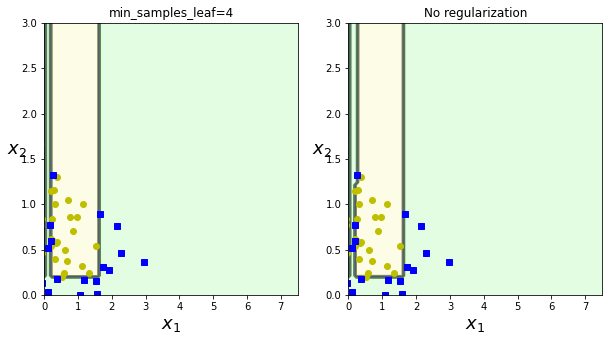

In [ ]:
tree_leaf=DecisionTreeClassifier(min_samples_leaf=4)
tree_leaf.fit(data[0],data[1]);
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title('min_samples_leaf=4')
plot_decision_boundary(tree_leaf,data[0],data[1])
plt.subplot(1,2,2)
plt.title('No regularization')
plot_decision_boundary(tree,data[0],data[1])

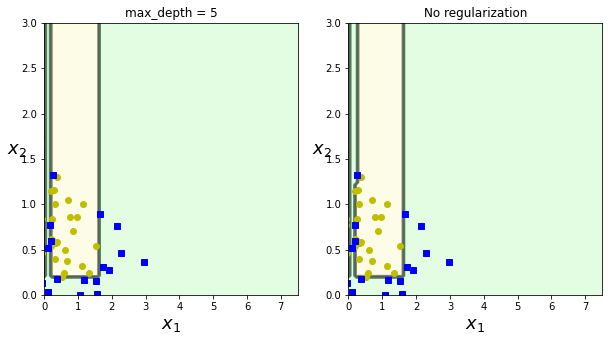

In [ ]:
tree_depth=DecisionTreeClassifier(max_depth=5)
tree_depth.fit(data[0],data[1]);
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title('max_depth = 5')
plot_decision_boundary(tree_depth,data[0],data[1])
plt.subplot(1,2,2)
plt.title('No regularization')
plot_decision_boundary(tree,data[0],data[1])

#### Q. Comment on the boundary surface of the decision tree. 

**Ans:** Boundary surface of decision tree is orthogonal. This is because at each node the boundary splits the data according to a certain criteria, It splits the data at that node into two based on that condition. As this split is into two parts the decision boundary is a straight line, which in other words orthogonal. 

### C. Linear classifiers vs decision tree classifiers

In [17]:
#Generate 100 points [x1, x2] in the 2D plane using np.random.rand() for -0.5<x1<0.5 and -0.5<x2<0.5
x = np.random.rand(100,2) - 0.5
y = np.zeros(100)
#Assign a label of 1 to all points having x1>0.0 and 0 otherwise
y[x[:,0]>0] = 1
#Rotate the dataset by 45 degrees in the [x1,x2] plane
rot = [[0.414,-0.414],[0.414,0.414]]
x_rot = np.matmul(rot,x.T)
x_rot = x_rot.T

1. Fit a linear Logistic Regression model and Decision Tree on the x_rot
2. Fit a linear Logistic Regression model and Decision tree on the make_moons dataset generated in A(1)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train,X_test,y_train,y_test=train_test_split(x_rot,y,test_size=0.2,random_state=100)
lr=LogisticRegression()
lr.fit(x_rot,y)
print('Accuracy for logistic regression',accuracy_score(lr.predict(x_rot),y))

tree=DecisionTreeClassifier()
tree.fit(x_rot,y)
print('Accuracy for decision tree classifier',accuracy_score(tree.predict(x_rot),y))

Accuracy for logistic regression 0.99
Accuracy for decision tree classifier 1.0


In [19]:
#X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],test_size=0.1,random_state=100)
lr=LogisticRegression()
lr.fit(data[0],data[1])
print('Accuracy for logistic regression',accuracy_score(lr.predict(data[0]),data[1]))

tree=DecisionTreeClassifier()
tree.fit(data[0],data[1])
print('Accuracy for decision tree classifier',accuracy_score(tree.predict(data[0]),data[1]))

Accuracy for logistic regression 0.86
Accuracy for decision tree classifier 1.0


#### Q. Compare the performance of Decision Trees and logistic regression on the two datasets

**Ans:** The Decision tree model overfits with a train accuracy 1.0, where as the logistic regression model has a less train accuracy, which means it generalizes well with unknown data. 

### D. Regression using decision trees

1. Train a regression tree on the noisy sine dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [20]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Sine + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = np.sin(2*np.pi*X) + np.random.randn(150, 1) / 10

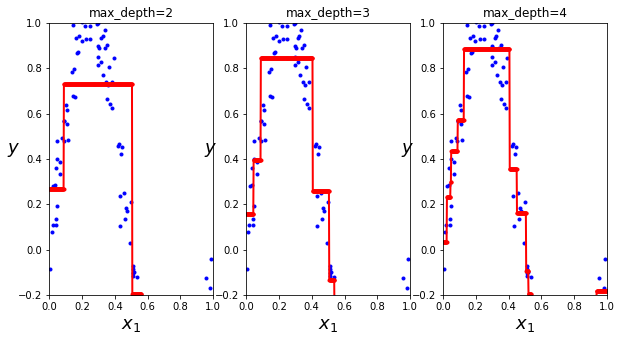

In [21]:
from sklearn.tree import DecisionTreeRegressor
plt.figure(figsize=[10,5])
for i in [2,3,4]:
  tree=DecisionTreeRegressor(max_depth=i)
  tree.fit(X,y)
  plt.subplot(1,3,i-1)
  plt.title('max_depth='+str(i))
  plot_regression_predictions(tree,X,y)

### E. Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 

**Ans:** If no regularization is applied as shown in below figure, the model passes through almost every point which means it literally overfits. But the models with max_depth parameter, doesn't overfit and generalizes well.  

Text(0.5, 1.0, 'no regularization')

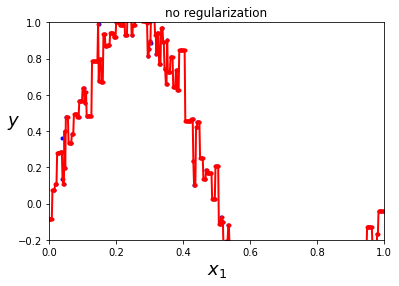

In [22]:
tree=DecisionTreeRegressor()
tree.fit(X,y)
plot_regression_predictions(tree,X,y)
plt.title('no regularization')

### F. Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.5$). Random seed = 42 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $35$ for max_leaf_nodes and $2$ to $10$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [ ]:
data=datasets.make_moons(n_samples=10000, noise=0.5, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],test_size=0.2,random_state=100)
from sklearn.model_selection import GridSearchCV
tree=DecisionTreeClassifier()
param_grid = {'max_leaf_nodes':range(2,36),'min_samples_split':range(2,11)}
search = GridSearchCV(tree, param_grid)
search.fit(data[0],data[1])
search.best_params_

{'max_leaf_nodes': 18, 'min_samples_split': 2}

Accuracy

In [ ]:
y_pred=search.predict(X_test)
accuracy_score(y_test,y_pred)

0.8275

### G. Training the Random Forest model
1. Load the loans dataset and use one-hot encoding for the column 'purpose'
2. Split the data into test and train sets with ratio 70:30 with random seed = 101
3. Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
4. Predict the class of not.fully.paid for the X_test data
5. Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [ ]:
loan_data=pd.read_csv('loan_data.csv')
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc=RandomForestClassifier()

dummy=pd.get_dummies(loan_data.purpose)
loan_data= pd.concat([loan_data, dummy], axis=1)
loan_data=loan_data.drop('purpose',axis=1)

X_train,X_test,y_train,y_test=train_test_split(loan_data.drop('not.fully.paid',axis=1),loan_data['not.fully.paid'],test_size=0.3,random_state=101)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.32      0.01      0.03       443

    accuracy                           0.84      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874



**Observation:**

1) Here we can observe that the number of data points with label 0 is much higher than label 1 (2431>443). Also the f1-score for label 1 is 0.03, recall is 0.01, which implies that among the predicted 1, only a few are correct. Which in turn affects the model. 